<a href="https://colab.research.google.com/github/AenimaLabs/TelecomX2/blob/main/TelecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X – Parte 2: Predicción de Cancelación (Churn)

📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

##Cargando CSV

In [186]:
import pandas as pd

ruta = 'https://raw.githubusercontent.com/AenimaLabs/TelecomX2/refs/heads/main/df_clean.csv'
df = pd.read_csv(ruta)

In [187]:
df.head()

,ID_Cliente,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19,3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00,1
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,...,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46,1
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,...,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.27,4
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,...,1,1,0,Mes a mes,1,Cheque por correo,83.9,267.40,2.80,2


In [188]:
df.columns

Index(['ID_Cliente', 'Abandono', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total',
       'Cargo_Diario', 'Cantidad_Servicios'],
      dtype='object')

##Eliminación de Columnas Irrelevantes

In [189]:
columnas_a_eliminar = ['ID_Cliente']
df_limpio = df.drop(columns=columnas_a_eliminar)
print(df_limpio.columns.to_list())
print(df_limpio.dtypes)

['Abandono', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios']
Abandono                    int64
Genero                     object
Adulto_Mayor                int64
Tiene_Pareja                int64
Tiene_Dependientes          int64
Meses_Contrato              int64
Servicio_Telefonico         int64
Multiples_Lineas            int64
Servicio_Internet          object
Seguridad_Online            int64
Respaldo_Online             int64
Proteccion_Dispositivo      int64
Soporte_Tecnico             int64
Streaming_TV                int64
Streaming_Peliculas         int64
Tipo_Contrato              object
Factura_Electronica         int64
Metodo_Pago    

In [190]:
df_limpio.head(3)

,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios
0,0,Femenino,0,1,1,9,1,0,DSL,0,...,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19,3
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00,1
2,1,Masculino,0,0,0,4,1,0,Fibra Óptica,0,...,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46,1


##Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [191]:
# Aplicar one-hot encoding a las variables categóricas
df_encoded = pd.get_dummies(
    df_limpio,
    columns=['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago'],
    prefix=['Genero', 'Internet', 'Contrato', 'Pago'],  # prefijos para claridad
    drop_first=False,  # mantenemos todas las categorías (evita colinealidad más adelante si se usa regresión)
    dtype=int  # convierte las columnas a enteros
)

# Mostrar nuevas columnas
print("Columnas después de one-hot encoding:")
print(df_encoded.columns.tolist())
print(df_encoded.dtypes)

Columnas después de one-hot encoding:
['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']
Abandono                         int64
Adulto_Mayor                     int64
Tiene_Pareja                     int64
Tiene_Dependientes               int64
Meses_Contrato                   int64
Servicio_Telefonico              int64
Multiples_Lineas                 int64
Seguridad_Online                 int64
Respaldo_Online             

In [192]:
df_encoded.head(3)

,Abandono,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,...,Internet_DSL,Internet_Fibra Óptica,Internet_Sin Internet,Contrato_Dos años,Contrato_Mes a mes,Contrato_Un año,Pago_Cheque electrónico,Pago_Cheque por correo,Pago_Tarjeta de crédito,Pago_Transferencia bancaria
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [193]:
print(df_encoded.columns.to_list())

['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']


##Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [194]:
# Conteo absoluto
conteo_abandono = df_encoded['Abandono'].value_counts().sort_index()

# Proporciones
proporcion_abandono = df_encoded['Abandono'].value_counts(normalize=True).sort_index()

# Mostrar resultados
print("Conteo de clientes por clase:")
print(conteo_abandono)
print("\nProporción de clientes por clase:")
print(proporcion_abandono)

Conteo de clientes por clase:
Abandono
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes por clase:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64


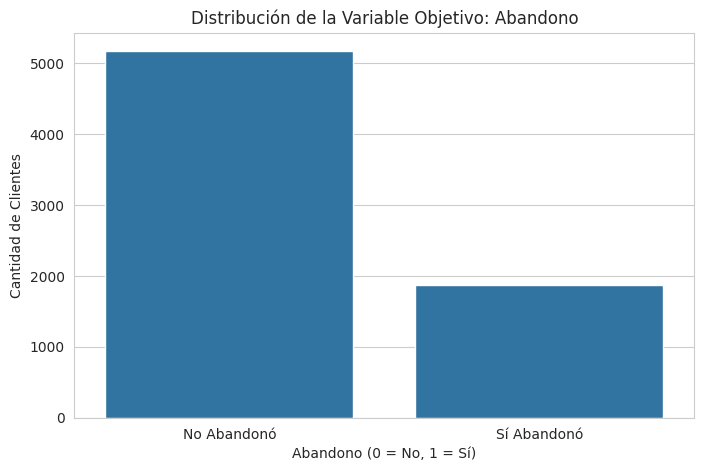

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(data=df_encoded, x='Abandono')
plt.title('Distribución de la Variable Objetivo: Abandono')
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])
plt.show()

### * Hay desbalance: 79% - 21%
### * No es extremo, pero requiere atención en la evaluación del modelo
### *  Objetivo: Maximizar el recall de la clase 1 (Abandono) → Queremos detectar la mayor cantidad posible de cancelaciones reales, aunque a costa de algunos falsos positivos.

###Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

➡️ Como se verá más adelante, utilizaré Regresión Logística y Random Forest, donde sólo en la primera es relevante, dado que utiliza descenso de gradiente. Si las variables no están a escala, converge más lento o se sesga. Por otro lado, Random Forest, al estar basado en múltiples árboles, los cuales a su vez dividen el espacio en umbrales, es insensible a la escala.

Se aplicará a  columnas numéricas continuas como: ['Meses_Contrato', 'Cargo_Mensual'], y se realizará mediante StandardScaler()

## Análisis de Correlación
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de que todas las columnas sean numéricas (deben serlo tras one-hot)
df_numeric = df_encoded.select_dtypes(include=['number'])

# Mostrar las columnas numéricas
print("Columnas numéricas disponibles:")
print(df_numeric.columns.tolist())
print(df_numeric.dtypes)

Columnas numéricas disponibles:
['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']
Abandono                         int64
Adulto_Mayor                     int64
Tiene_Pareja                     int64
Tiene_Dependientes               int64
Meses_Contrato                   int64
Servicio_Telefonico              int64
Multiples_Lineas                 int64
Seguridad_Online                 int64
Respaldo_Online                  i

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df_encoded.corr()

# Mostrar solo correlación con Abandono (ordenado por valor absoluto)
correlacion_con_abandono = correlation_matrix['Abandono'].sort_values(key=abs, ascending=False)

print("\nCorrelación con Abandono (ordenado por valor absoluto):")
print(correlacion_con_abandono)


Correlación con Abandono (ordenado por valor absoluto):
Abandono                       1.000000
Contrato_Mes a mes             0.405103
Meses_Contrato                -0.352229
Internet_Fibra Óptica          0.308020
Contrato_Dos años             -0.302253
Pago_Cheque electrónico        0.301919
Internet_Sin Internet         -0.227890
Cargo_Total                   -0.198324
Cargo_Diario                   0.193412
Cargo_Mensual                  0.193356
Factura_Electronica            0.191825
Contrato_Un año               -0.177820
Seguridad_Online              -0.171226
Soporte_Tecnico               -0.164674
Tiene_Dependientes            -0.164221
Adulto_Mayor                   0.150889
Tiene_Pareja                  -0.150448
Pago_Tarjeta de crédito       -0.134302
Internet_DSL                  -0.124214
Pago_Transferencia bancaria   -0.117937
Pago_Cheque por correo        -0.091683
Cantidad_Servicios            -0.087698
Respaldo_Online               -0.082255
Proteccion_Dispositivo 

* Las variables con mayor riesgo de abanadono (correlación positiva):
  * Contrato_Mes a mes: estos clientes pueden cancelar en cualquier momento, por ende genera una alta rotación. Se podrían ofrecer descuentos para migrar a contratos semestrales o anuales.
  * Internet_Fibra óptica: habrá que investigar los reclamos técnicos, la calidad de servicio y ofrecer un mejor soporte para retener a estos clientes.
  * Pago_Cheque electrónico: se entiende que el perfil del clientes es más volátil, también habría que auditar fallas en cobros y mejorar la comunicación de facturación.
  * Cargo_Diario y Cargo_Mensual van de la mano, se podría evaluar planes más económicos o con beneficios para clientes de alto costo.
  * Factura_Electrónica: puede indicar que el cliente digital cancela más fácil.

* Las variables con mayor retención (correlación negativa):
  * Meses_Contrato: cuanto más tiempo lleva el cliente, menos probable es que abandone.
  * Contrato_Dos años: similar a la lectura de la variable anterior.
  * Internet_Sin Internet: los clientes sin internet abandonan menos, no asumir que más servicios equivale a una mayor retención.
  * Seguridad_Online, Soporte_Tecnico, Tiene_Dependientes: promover paquetes con valor agregado.



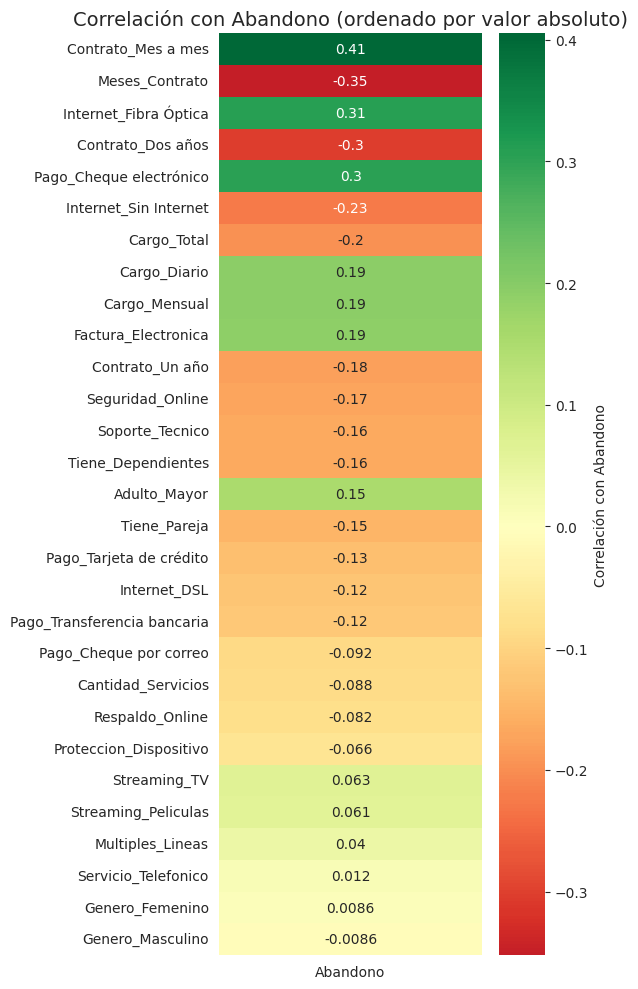

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Solo correlación con Abandono (sin repetir)
corr_abandono = df_encoded.corr()[['Abandono']].drop('Abandono')

plt.figure(figsize=(6, 10))
sns.heatmap(
    corr_abandono.sort_values(by='Abandono', key=abs, ascending=False),
    annot=True,
    cmap='RdYlGn', center=0,
    cbar_kws={"label": "Correlación con Abandono"}
)
plt.title('Correlación con Abandono (ordenado por valor absoluto)', fontsize=14)
plt.tight_layout()
plt.show()

Index(['Contrato_Mes a mes', 'Meses_Contrato', 'Internet_Fibra Óptica',
       'Contrato_Dos años', 'Pago_Cheque electrónico', 'Internet_Sin Internet',
       'Cargo_Total', 'Cargo_Diario', 'Cargo_Mensual', 'Factura_Electronica'],
      dtype='object')


/tmp/ipython-input-20757857.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_values.values, y=top_corr_values.index, palette="vlag")


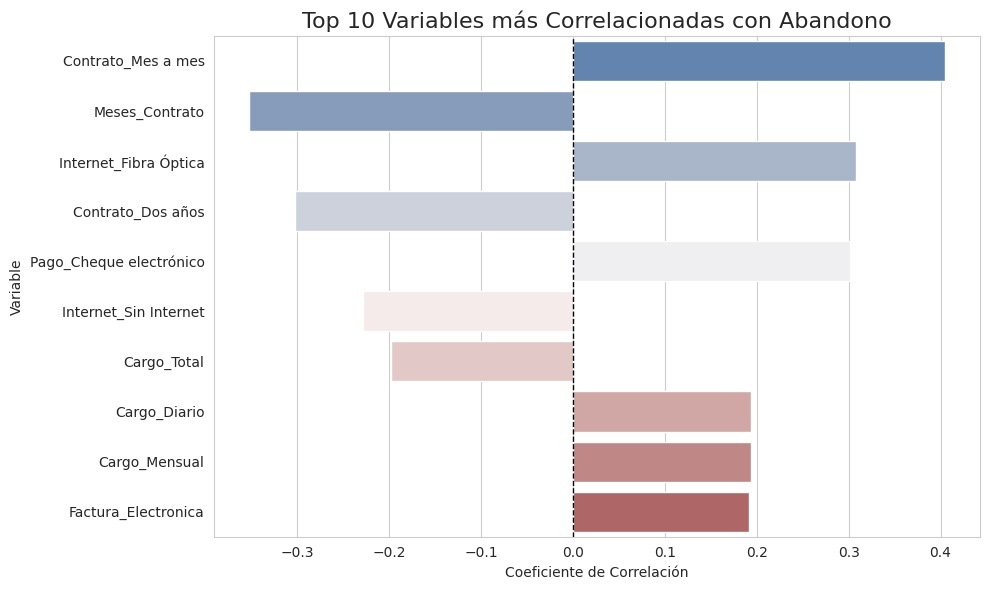

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 variables más correlacionadas con Abandono (en valor absoluto)
top_corr = correlacion_con_abandono.drop('Abandono').abs().sort_values(ascending=False).head(10)
top_corr_names = top_corr.index
print(top_corr_names)

# Obtener correlaciones reales (con signo)
top_corr_values = correlacion_con_abandono[top_corr_names]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_values.values, y=top_corr_values.index, palette="vlag")
plt.title('Top 10 Variables más Correlacionadas con Abandono', fontsize=16)
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variable')
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

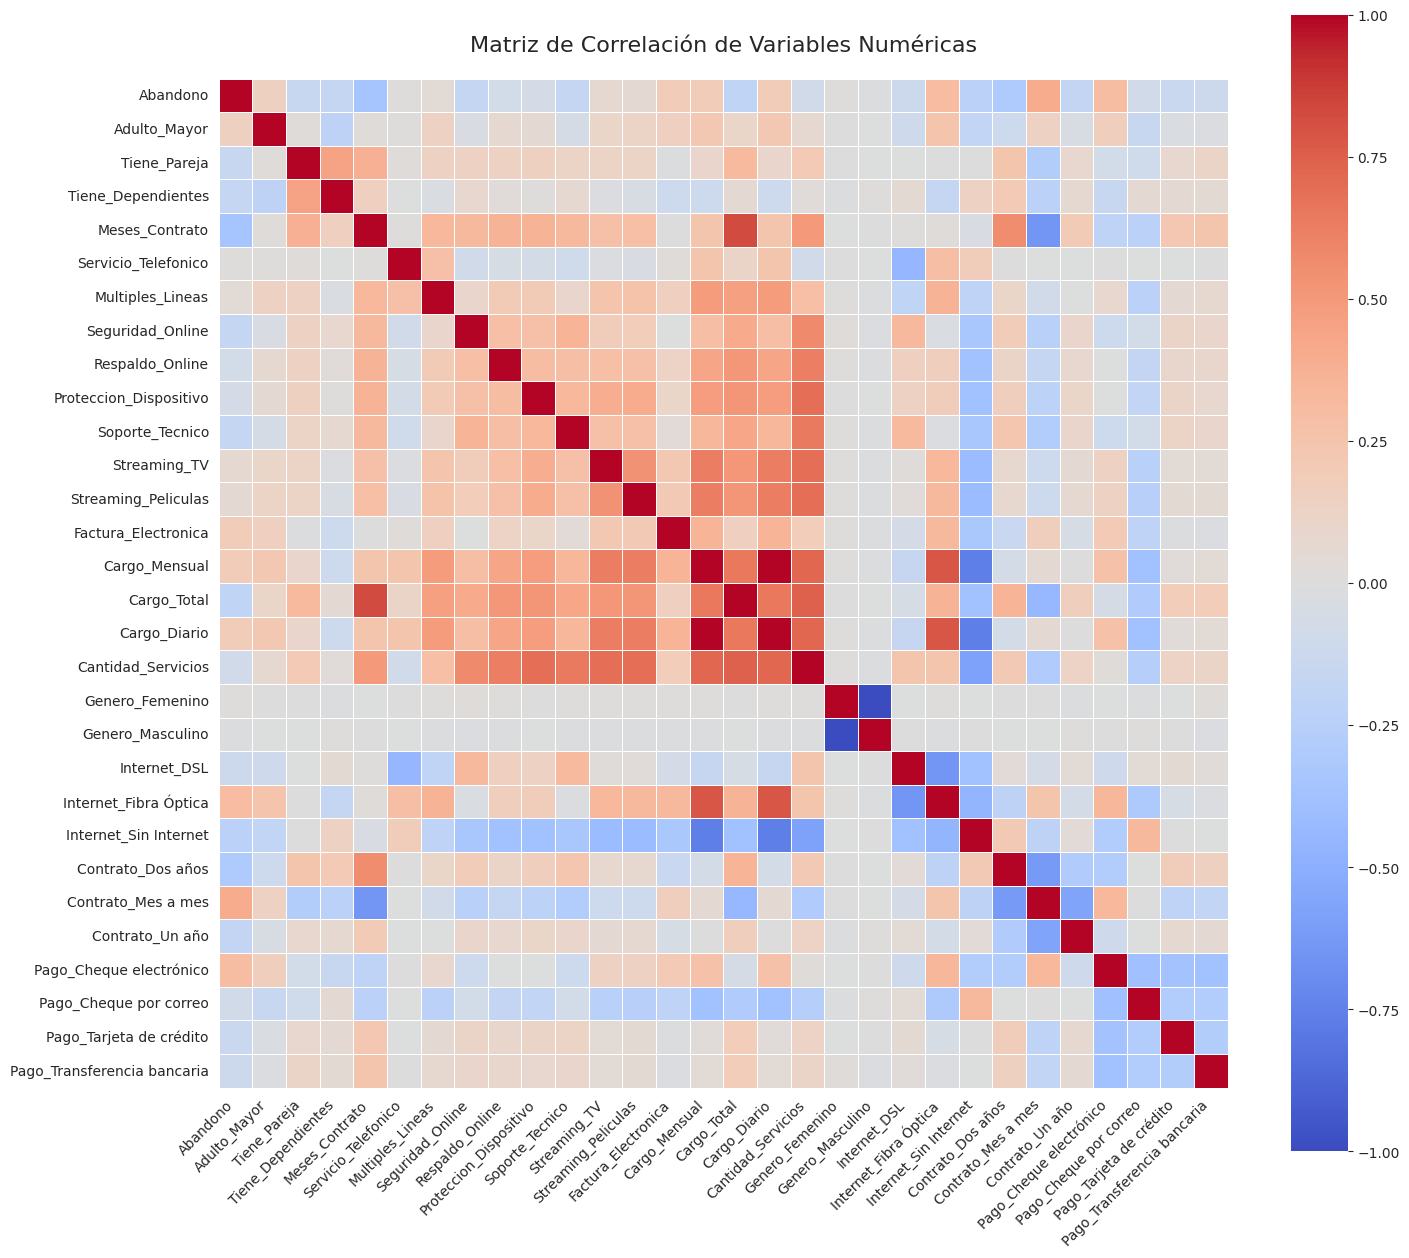

In [200]:
# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Tamaño del gráfico
plt.figure(figsize=(15, 13))

# Mapa de calor
sns.heatmap(
    correlation_matrix,
    annot=False,           # No mostrar números para no saturar
    cmap='coolwarm',       # Colores: rojo (+), azul (-), blanco (0)
    center=0,
    square=True,
    linewidths=0.5
)

plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [201]:
# # Eliminar columnas problemáticas: Cargo_Total con riesgo de data leakage y Cargo_Diario es redundante con Cargo_Mensual
# columnas_a_eliminar = ['Cargo_Total', 'Cargo_Diario']
# df_modelo = df_encoded.drop(columns=columnas_a_eliminar)

# # Verificar
# print("Columnas finales para modelado:")
# print(df_modelo.columns.tolist())

#No  los  eliminaremos aún dado el análisis dirigido de la  pregunta siguiente

###Análisis Dirigido
Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

/tmp/ipython-input-493414390.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Abandono', y='Meses_Contrato', palette='Set2')


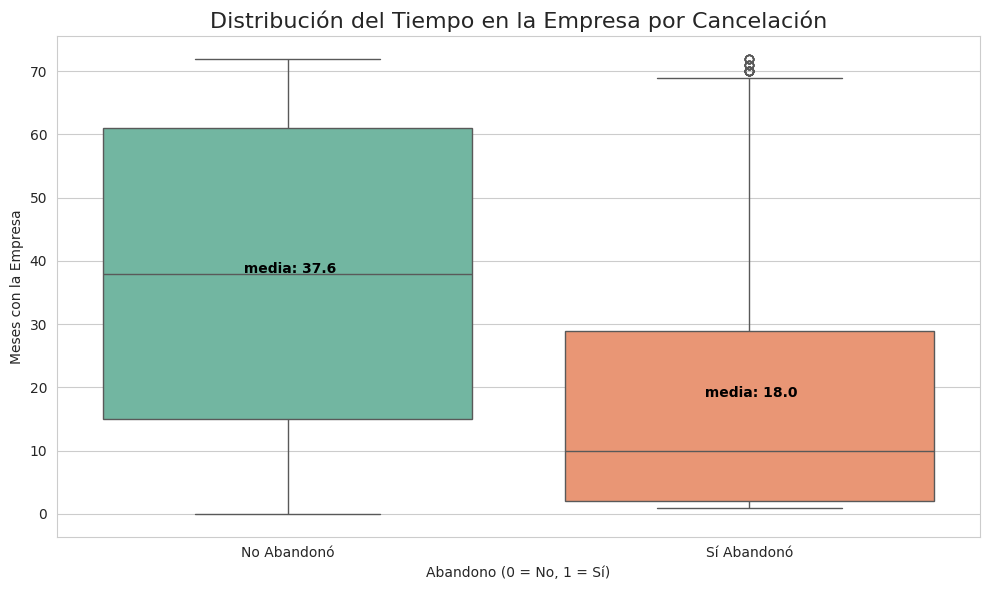

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Abandono', y='Meses_Contrato', palette='Set2')

# Personalización
plt.title('Distribución del Tiempo en la Empresa por Cancelación', fontsize=16)
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Meses con la Empresa')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])

# Añadir medias
for i, abandono in enumerate([0, 1]):
    mean_val = df_encoded[df_encoded['Abandono'] == abandono]['Meses_Contrato'].mean()
    plt.text(i, mean_val, f' media: {mean_val:.1f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-148068336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Abandono', y='Cargo_Total', palette='Blues')


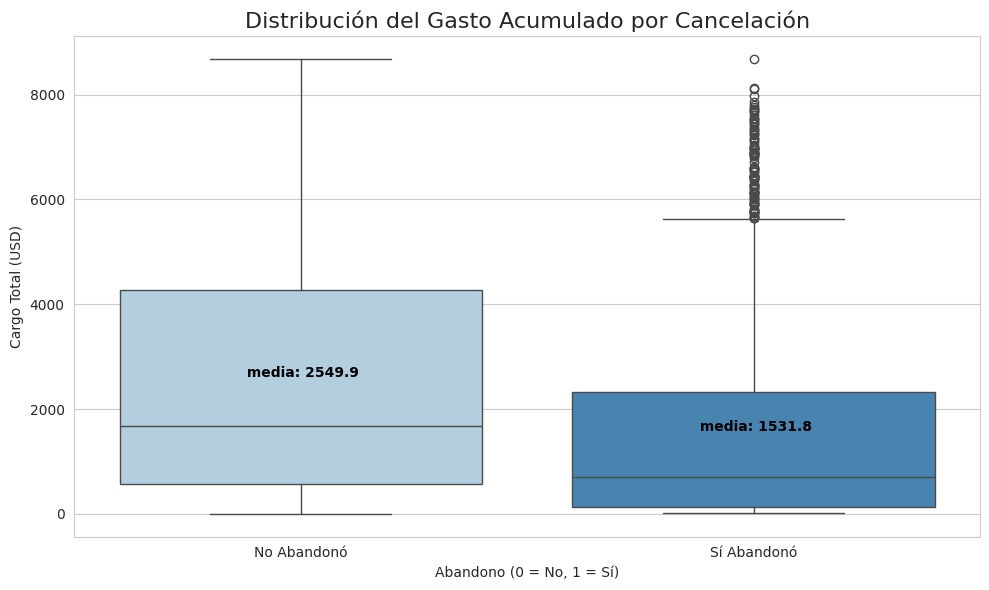

In [203]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Abandono', y='Cargo_Total', palette='Blues')

plt.title('Distribución del Gasto Acumulado por Cancelación', fontsize=16)
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Cargo Total (USD)')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])

# Añadir medias
for i, abandono in enumerate([0, 1]):
    mean_val = df_encoded[df_encoded['Abandono'] == abandono]['Cargo_Total'].mean()
    plt.text(i, mean_val, f' media: {mean_val:.1f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2310029095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Abandono', y='Cargo_Mensual', palette='Oranges')


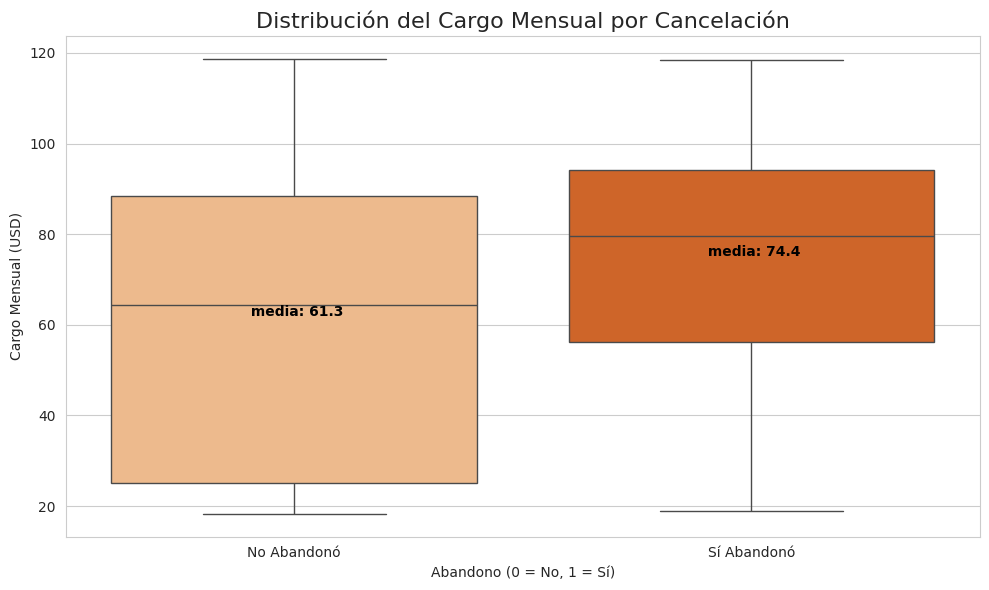

In [204]:
#dado que Cargo_Total  puede resultar engañoso, analizaremos el costo mensual
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Abandono', y='Cargo_Mensual', palette='Oranges')

plt.title('Distribución del Cargo Mensual por Cancelación', fontsize=16)
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Cargo Mensual (USD)')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])

# Añadir medias
for i, abandono in enumerate([0, 1]):
    mean_val = df_encoded[df_encoded['Abandono'] == abandono]['Cargo_Mensual'].mean()
    plt.text(i, mean_val, f' media: {mean_val:.1f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

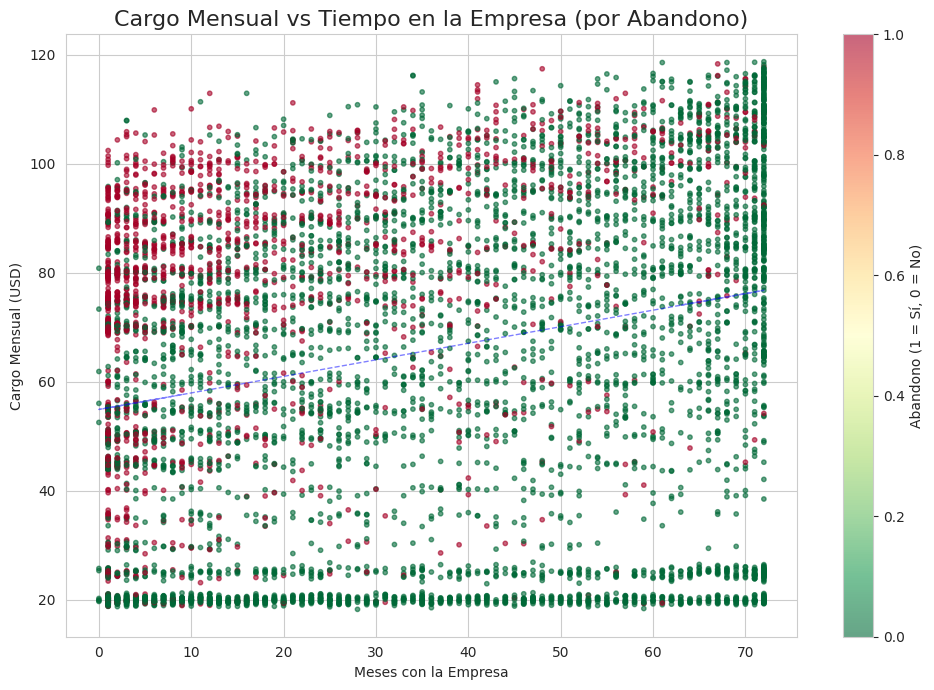

In [205]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df_encoded['Meses_Contrato'],
    df_encoded['Cargo_Mensual'],
    c=df_encoded['Abandono'],
    cmap='RdYlGn_r',  # rojo = abandono, verde = no abandono
    alpha=0.6,
    s=10
)

plt.title('Cargo Mensual vs Tiempo en la Empresa (por Abandono)', fontsize=16)
plt.xlabel('Meses con la Empresa')
plt.ylabel('Cargo Mensual (USD)')
plt.colorbar(scatter, label='Abandono (1 = Sí, 0 = No)')

# Línea de tendencia suave (opcional)
import numpy as np
z = np.polyfit(df_encoded['Meses_Contrato'], df_encoded['Cargo_Mensual'], 1)
p = np.poly1d(z)
plt.plot(df_encoded['Meses_Contrato'], p(df_encoded['Meses_Contrato']), "b--", alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

## Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [206]:
# Eliminar variables problemáticas
columnas_a_eliminar = ['Cargo_Total', 'Cargo_Diario']
df_modelo = df_encoded.drop(columns=columnas_a_eliminar)
print("Columnas finales para modelado:")
print(df_modelo.columns.tolist())

# Definir características (X) y objetivo (y)
X = df_modelo.drop(columns=['Abandono'])
y = df_modelo['Abandono']

# Mostrar forma final
print(f"Forma de X (características): {X.shape}")
print(f"Forma de y (objetivo): {y.shape}")

Columnas finales para modelado:
['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']
Forma de X (características): (7043, 27)
Forma de y (objetivo): (7043,)


In [207]:
from sklearn.model_selection import train_test_split

# División 80/20 con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,      # Reproducibilidad
    stratify=y          # Mantiene proporción de Abandono en ambos conjuntos
)

# Verificar proporciones
print("\nProporción de Abandono en conjunto completo:")
print(y.value_counts(normalize=True).sort_index())

print("\nProporción de Abandono en entrenamiento:")
print(y_train.value_counts(normalize=True).sort_index())

print("\nProporción de Abandono en prueba:")
print(y_test.value_counts(normalize=True).sort_index())


Proporción de Abandono en conjunto completo:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Proporción de Abandono en entrenamiento:
Abandono
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Proporción de Abandono en prueba:
Abandono
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [208]:
print(f"\nTamaño de X_train: {X_train.shape} ({len(X_train)} filas)")
print(f"Tamaño de X_test:  {X_test.shape} ({len(X_test)} filas)")


Tamaño de X_train: (5634, 27) (5634 filas)
Tamaño de X_test:  (1409, 27) (1409 filas)


##Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [209]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas continuas (que necesitan escalamiento)
columnas_numericas = ['Meses_Contrato', 'Cargo_Mensual']  # evitamos Cargo_Total y Cargo_Diario (ya eliminadas)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar en entrenamiento y transformar prueba
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Aplicar escalamiento solo a numéricas
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

print("Escalamiento aplicado a: Meses_Contrato y Cargo_Mensual")

Escalamiento aplicado a: Meses_Contrato y Cargo_Mensual


In [210]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluar_modelo(y_test, y_pred, y_pred_proba, nombre_modelo):
    print(f"\n\n🚀 EVALUACIÓN - {nombre_modelo}")
    print("\n--- Matriz de Confusión ---")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandono', 'Abandono'], yticklabels=['No Abandono', 'Abandono'])
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()

    print("\n--- Reporte de Clasificación ---")
    print(f"\n Matriz de confusión en números: \n{cm}")
    print(classification_report(y_test, y_pred))

    print(f"\n--- ROC-AUC ---")
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC: {auc:.4f}")

Random Forest



🚀 EVALUACIÓN - Random Forest

--- Matriz de Confusión ---


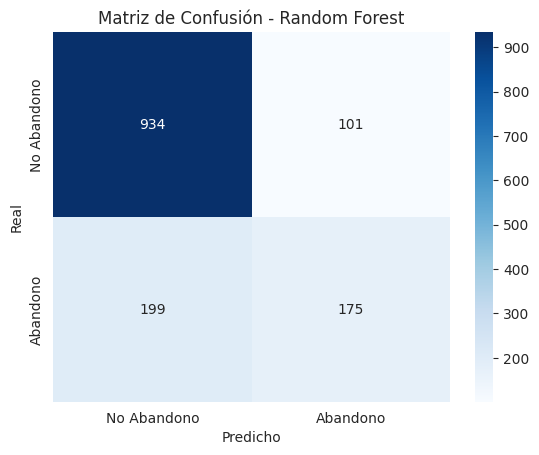


--- Reporte de Clasificación ---

 Matriz de confusión en números: 
[[934 101]
 [199 175]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409


--- ROC-AUC ---
ROC-AUC: 0.8172


In [211]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)

# Predecir
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluar
evaluar_modelo(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")

Regresión Logística



🚀 EVALUACIÓN - Regresión Logística

--- Matriz de Confusión ---


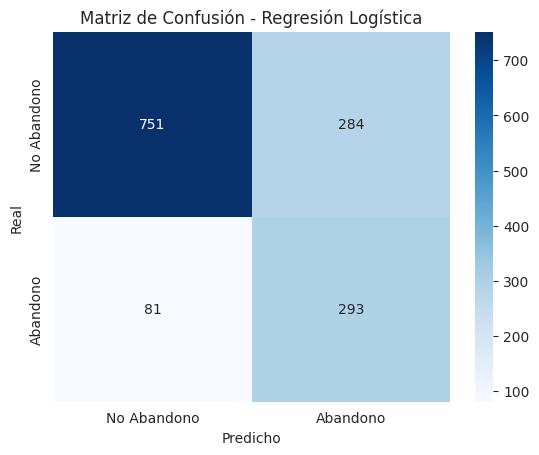


--- Reporte de Clasificación ---

 Matriz de confusión en números: 
[[751 284]
 [ 81 293]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


--- ROC-AUC ---
ROC-AUC: 0.8422


In [212]:
from sklearn.linear_model import LogisticRegression

# Entrenar con datos escalados
lr = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
lr.fit(X_train_scaled, y_train)

# Predecir
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluar
evaluar_modelo(y_test, y_pred_lr, y_pred_proba_lr, "Regresión Logística")

In [213]:
# Mostrar coeficientes más relevantes
coef = lr.coef_[0]
features = X_train_scaled.columns

# Crear DataFrame
coef_df = pd.DataFrame({'Característica': features, 'Coeficiente': coef})
coef_df = coef_df.sort_values(by='Coeficiente', key=abs, ascending=False)

print("\nTop 10 características más influyentes (Regresión Logística):")
print(coef_df.head(10))


Top 10 características más influyentes (Regresión Logística):
           Característica  Coeficiente
19  Internet_Sin Internet    -0.926407
20      Contrato_Dos años    -0.801881
3          Meses_Contrato    -0.783884
18  Internet_Fibra Óptica     0.719480
21     Contrato_Mes a mes     0.594294
4     Servicio_Telefonico    -0.423444
10           Streaming_TV     0.343839
12    Factura_Electronica     0.339345
9         Soporte_Tecnico    -0.326732
5        Multiples_Lineas     0.312073


## Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:

  * Exactitud (Acurácia)

  * Precisión

  * Recall

  * F1-score

  * Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

  * ¿Cuál modelo tuvo el mejor desempeño?

  * ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

    * Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

    * Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.



🚀 EVALUACIÓN - Random Forest

--- Matriz de Confusión ---


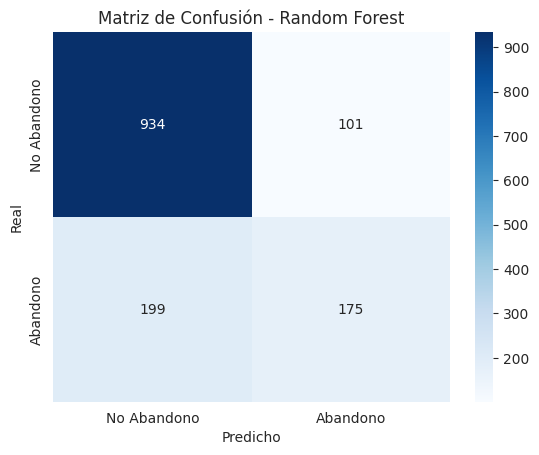


--- Reporte de Clasificación ---

 Matriz de confusión en números: 
[[934 101]
 [199 175]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409


--- ROC-AUC ---
ROC-AUC: 0.8172


🚀 EVALUACIÓN - Regresión Logística

--- Matriz de Confusión ---


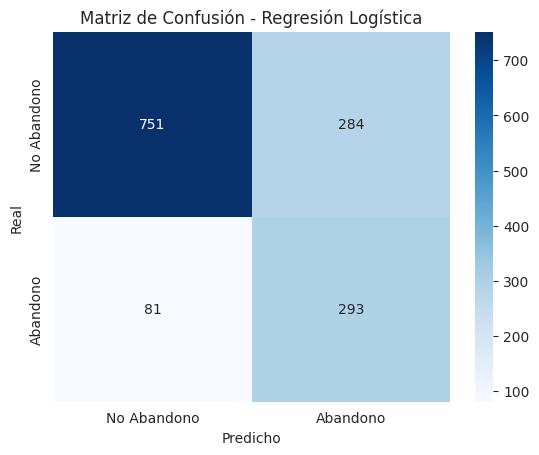


--- Reporte de Clasificación ---

 Matriz de confusión en números: 
[[751 284]
 [ 81 293]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


--- ROC-AUC ---
ROC-AUC: 0.8422


In [214]:
# Evaluar
evaluar_modelo(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")
evaluar_modelo(y_test, y_pred_lr, y_pred_proba_lr, "Regresión Logística")


Recordando:
* Exactitud (Accuracy) : Proporción de predicciones correctas.
* Precisión : De los que predice como abandono, ¿cuántos realmente lo fueron?
* Recall (Sensibilidad) : ¿Qué porcetaje de los verdaderos abandonos detectó?
* F1 - score : Balance entre precisión y recall.
* Matriz de confusión : vista detallada de errores.

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Modelo': ['Random Forest', 'Regresión Logística'],
    'Accuracy': [0.79, 0.74],
    'Precision_Abandono': [0.63, 0.51],
    'Recall_Abandono': [0.47, 0.78],
    'F1_Score_Abandono': [0.54, 0.62],
    'ROC_AUC': [0.8172, 0.8422]
}

# Crear DataFrame
df_comparativo = pd.DataFrame(data)

# Mostrar tabla
print("📊 Análisis Comparativo de Modelos")
display(df_comparativo.round(3))

📊 Análisis Comparativo de Modelos


,Modelo,Accuracy,Precision_Abandono,Recall_Abandono,F1_Score_Abandono,ROC_AUC
0,Random Forest,0.79,0.63,0.47,0.54,0.817
1,Regresión Logística,0.74,0.51,0.78,0.62,0.842


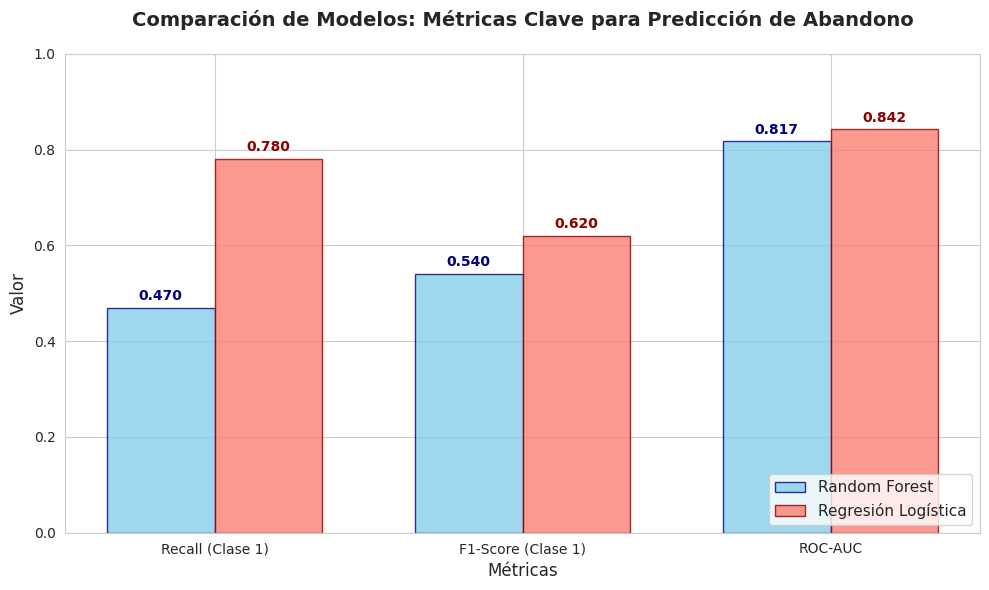

In [216]:
# Métricas clave para graficar
metrics = ['Recall_Abandono', 'F1_Score_Abandono', 'ROC_AUC']
labels = ['Recall (Clase 1)', 'F1-Score (Clase 1)', 'ROC-AUC']

# Configurar estilo
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Ancho de barras y posición
x = range(len(metrics))
width = 0.35

# Extraer valores
rf_values = df_comparativo.loc[df_comparativo['Modelo'] == 'Random Forest', metrics].values[0]
lr_values = df_comparativo.loc[df_comparativo['Modelo'] == 'Regresión Logística', metrics].values[0]

# Crear barras
plt.bar([i - width/2 for i in x], rf_values, width, label='Random Forest', color='skyblue', edgecolor='navy', alpha=0.8)
plt.bar([i + width/2 for i in x], lr_values, width, label='Regresión Logística', color='salmon', edgecolor='darkred', alpha=0.8)

# Etiquetas
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Comparación de Modelos: Métricas Clave para Predicción de Abandono', fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, labels)

# Añadir valores encima de las barras
for i, v in enumerate(rf_values):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10, color='navy')

for i, v in enumerate(lr_values):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10, color='darkred')

# Leyenda y ajustes
plt.legend(loc='lower right', fontsize=11)
plt.ylim(0, 1.0)
plt.tight_layout()

# Mostrar gráfico
plt.show()

Dado los resultados, existe overfitting en Random Forest, ajustaremos los hiperparámetros para intentar corregir



🚀 EVALUACIÓN - Random Forest

--- Matriz de Confusión ---


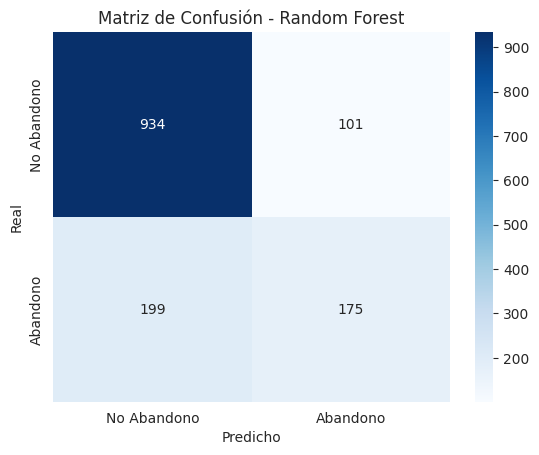


--- Reporte de Clasificación ---

 Matriz de confusión en números: 
[[934 101]
 [199 175]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409


--- ROC-AUC ---
ROC-AUC: 0.8172


In [217]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar
rf_ajustado = RandomForestClassifier( n_estimators=100,
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1 )
rf_ajustado.fit(X_train, y_train)

# Predecir
y_pred_rf_ajustado = rf_ajustado.predict(X_test)
y_pred_proba_rf_ajustado = rf_ajustado.predict_proba(X_test)[:, 1]

# Evaluar
evaluar_modelo(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")

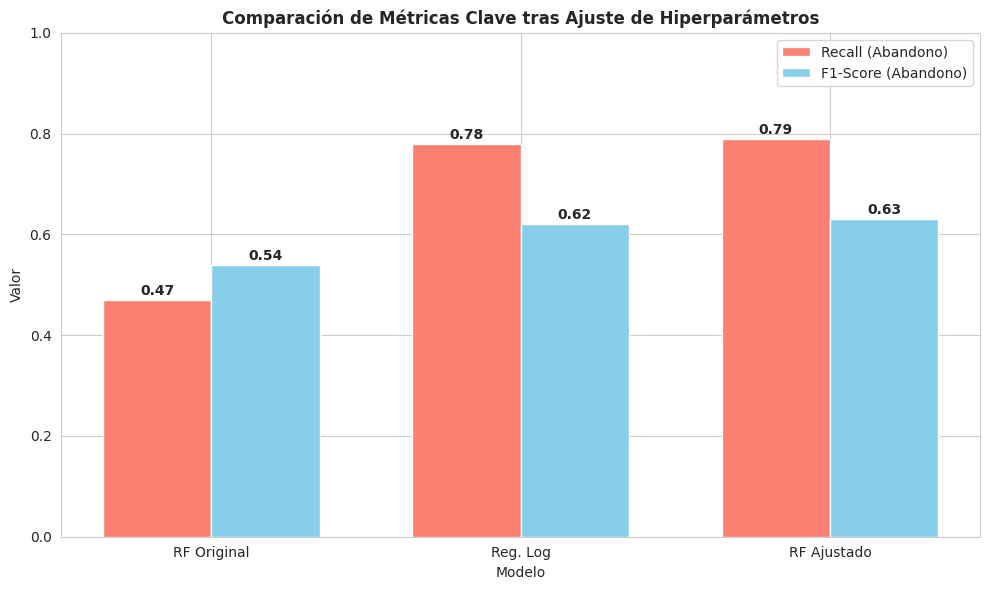

In [218]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
modelos = ['RF Original', 'Reg. Log', 'RF Ajustado']
recall = [0.47, 0.78, 0.79]
f1 = [0.54, 0.62, 0.63]

x = np.arange(len(modelos))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, recall, width, label='Recall (Abandono)', color='salmon')
plt.bar(x + width/2, f1, width, label='F1-Score (Abandono)', color='skyblue')

# Etiquetas
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.title('Comparación de Métricas Clave tras Ajuste de Hiperparámetros', fontweight='bold')
plt.xticks(x, modelos)
plt.ylim(0, 1.0)
plt.legend()

# Valores encima de barras
for i, v in enumerate(recall):
    plt.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center', fontweight='bold')

for i, v in enumerate(f1):
    plt.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Ahora intentaremos mejorar los números del modelo de Regresión Logística

In [219]:
#mejorando el código anterior

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir dos espacios separados para evitar errores
param_grid = [
    # Opción 1: L1 + saga
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1'],
        'solver': ['saga'],
        'max_iter': [1000]
    },
    # Opción 2: L2 + cualquiera
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [1000]
    },
    # Opción 3: ElasticNet + saga + l1_ratio
    {
        'C': [0.1, 1, 10],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.7, 0.9],  # requerido para elasticnet
        'max_iter': [1000]
    }
]

# GridSearch sin warnings
grid = GridSearchCV(
    estimator=LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0,
    error_score='raise'  # para ver errores reales si hay
)

# Entrenar
grid.fit(X_train_scaled, y_train)

# Mejor modelo
best_lr = grid.best_estimator_
print("✅ Mejores hiperparámetros:", grid.best_params_)
print("✅ Mejor F1 en validación cruzada:", grid.best_score_.round(4))

✅ Mejores hiperparámetros: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
✅ Mejor F1 en validación cruzada: 0.6294




🚀 EVALUACIÓN - Regresión Logística (Optimizada)

--- Matriz de Confusión ---


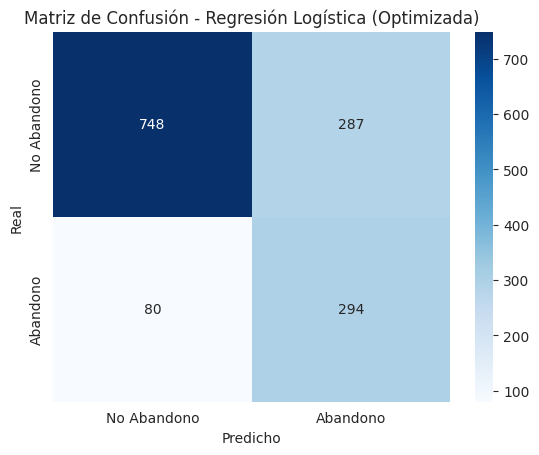


--- Reporte de Clasificación ---

 Matriz de confusión en números: 
[[748 287]
 [ 80 294]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


--- ROC-AUC ---
ROC-AUC: 0.8423


In [220]:
# Predecir con el mejor modelo
y_pred_best = best_lr.predict(X_test_scaled)
y_pred_proba_best = best_lr.predict_proba(X_test_scaled)[:, 1]

# Evaluar
evaluar_modelo(y_test, y_pred_best, y_pred_proba_best, "Regresión Logística (Optimizada)")

In [221]:
import pandas as pd

# Obtener coeficientes
coef = best_lr.coef_[0]
feature_names = X_train_scaled.columns

# Crear DataFrame
coef_df = pd.DataFrame({'Característica': feature_names, 'Coeficiente': coef})
coef_df['Abs_Coef'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values('Abs_Coef', ascending=False)

print("\nTop 10 variables más influyentes:")
print(coef_df[['Característica', 'Coeficiente']].head(10))


Top 10 variables más influyentes:
             Característica  Coeficiente
18    Internet_Fibra Óptica     1.667235
19    Internet_Sin Internet    -1.637693
13            Cargo_Mensual    -0.979965
3            Meses_Contrato    -0.784615
21       Contrato_Mes a mes     0.713773
20        Contrato_Dos años    -0.692278
10             Streaming_TV     0.592888
11      Streaming_Peliculas     0.498992
5          Multiples_Lineas     0.479198
23  Pago_Cheque electrónico     0.359691


In [222]:
from sklearn.metrics import recall_score, precision_score, f1_score
import numpy as np

# Probar diferentes umbrales
thresholds = np.arange(0.1, 0.6, 0.05)
f1_scores = []
recall_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_best >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))

# Encontrar umbral con mejor F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Mejor umbral: {best_threshold:.2f}")
print(f"F1 máximo: {f1_scores[best_idx]:.4f}")
print(f"Recall en ese umbral: {recall_scores[best_idx]:.4f}")

Mejor umbral: 0.55
F1 máximo: 0.6337
Recall en ese umbral: 0.7540


✅ Mejores hiperparámetros: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
✅ Mejor F1 en validación cruzada: 0.6294


🚀 EVALUACIÓN - Regresión Logística (Optimizada)

--- Matriz de Confusión ---


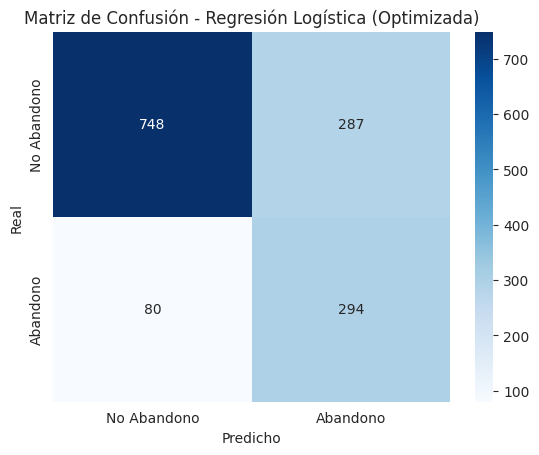


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


--- ROC-AUC ---
ROC-AUC: 0.8423

🔍 Top 10 variables más influyentes:
             Característica  Coeficiente
18    Internet_Fibra Óptica     1.667235
19    Internet_Sin Internet    -1.637693
13            Cargo_Mensual    -0.979965
3            Meses_Contrato    -0.784615
21       Contrato_Mes a mes     0.713773
20        Contrato_Dos años    -0.692278
10             Streaming_TV     0.592888
11      Streaming_Peliculas     0.498992
5          Multiples_Lineas     0.479198
23  Pago_Cheque electrónico     0.359691

🎯 Mejor umbral (por F1): 0.55
F1 máximo: 0.6337
Recall en ese umbral: 0.7540


In [223]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    recall_score, precision_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Definir espacio de hiperparámetros (sin errores) ---
param_grid = [
    # L1 + saga
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1'],
        'solver': ['saga'],
        'max_iter': [1000]
    },
    # L2 + liblinear/lbfgs
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [1000]
    },
    # ElasticNet + saga + l1_ratio
    {
        'C': [0.1, 1, 10],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.7, 0.9],
        'max_iter': [1000]
    }
]

# --- 2. GridSearchCV robusto ---
grid = GridSearchCV(
    estimator=LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0,
    error_score=np.nan  # maneja errores sin romper el flujo
)

# Entrenar
grid.fit(X_train_scaled, y_train)

# Mejor modelo
best_lr = grid.best_estimator_
print("✅ Mejores hiperparámetros:", grid.best_params_)
print("✅ Mejor F1 en validación cruzada:", grid.best_score_.round(4))

# --- 3. Predicciones y evaluación ---
y_pred_best = best_lr.predict(X_test_scaled)
y_pred_proba_best = best_lr.predict_proba(X_test_scaled)[:, 1]

# Función de evaluación
def evaluar_modelo(y_test, y_pred, y_pred_proba, nombre_modelo):
    print(f"\n\n🚀 EVALUACIÓN - {nombre_modelo}")
    print("\n--- Matriz de Confusión ---")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Abandono', 'Abandono'],
                yticklabels=['No Abandono', 'Abandono'])
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()

    print("\n--- Reporte de Clasificación ---")
    print(classification_report(y_test, y_pred))

    print(f"\n--- ROC-AUC ---")
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC: {auc:.4f}")

evaluar_modelo(y_test, y_pred_best, y_pred_proba_best, "Regresión Logística (Optimizada)")

# --- 4. Interpretación: Coeficientes ---
coef_df = pd.DataFrame({
    'Característica': X_train_scaled.columns,
    'Coeficiente': best_lr.coef_[0]
})
coef_df['Abs_Coef'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values('Abs_Coef', ascending=False)

print("\n🔍 Top 10 variables más influyentes:")
print(coef_df[['Característica', 'Coeficiente']].head(10))

# --- 5. Ajuste de umbral ---
thresholds = np.arange(0.1, 0.6, 0.05)
f1_scores = []
recall_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_best >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\n🎯 Mejor umbral (por F1): {best_threshold:.2f}")
print(f"F1 máximo: {f1_scores[best_idx]:.4f}")
print(f"Recall en ese umbral: {recall_scores[best_idx]:.4f}")

### **Comparativas finales**

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas extraídas de los resultados
data = {
    'Modelo': ['Random Forest (ajustado)', 'Regresión Logística (optimizada)'],
    'Accuracy': [0.75, 0.74],
    'Precision_Abandono': [0.52, 0.51],
    'Recall_Abandono': [0.79, 0.79],
    'F1_Score_Abandono': [0.63, 0.62],
    'ROC_AUC': [0.8424, 0.8423]
}

# Crear DataFrame
df_comparativo = pd.DataFrame(data)

# Mostrar tabla
print("📊 Análisis Comparativo de Modelos")
display(df_comparativo.round(4))

📊 Análisis Comparativo de Modelos


,Modelo,Accuracy,Precision_Abandono,Recall_Abandono,F1_Score_Abandono,ROC_AUC
0,Random Forest (ajustado),0.75,0.52,0.79,0.63,0.8424
1,Regresión Logística (optimizada),0.74,0.51,0.79,0.62,0.8423


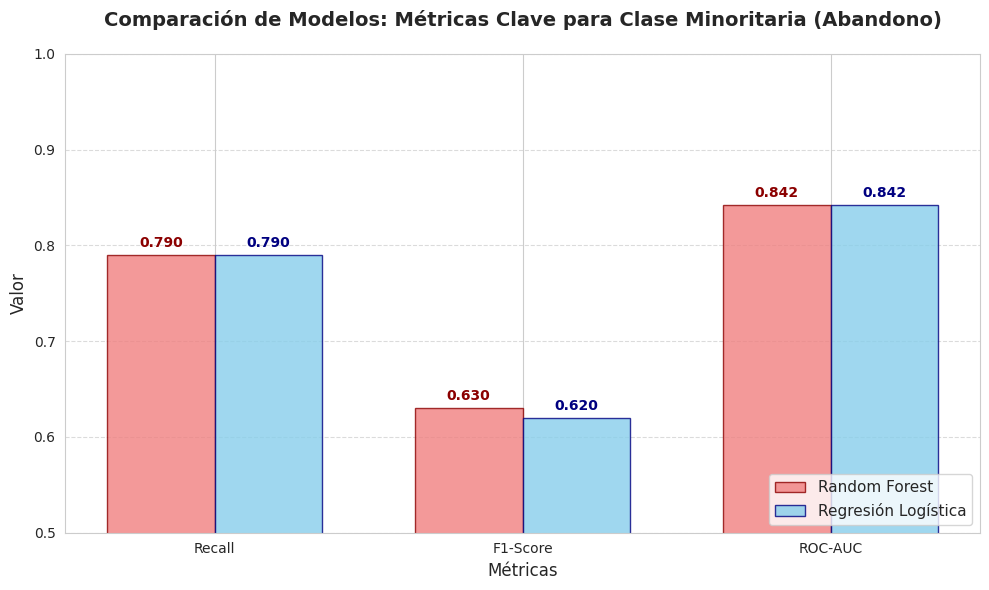

In [225]:
# Métricas a comparar (clase 1)
metrics = ['Recall_Abandono', 'F1_Score_Abandono', 'ROC_AUC']
labels = ['Recall', 'F1-Score', 'ROC-AUC']

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))

# Valores
rf_values = df_comparativo.loc[0, metrics]
lr_values = df_comparativo.loc[1, metrics]

# Barras
plt.bar(x - width/2, rf_values, width, label='Random Forest', color='lightcoral', edgecolor='darkred', alpha=0.8)
plt.bar(x + width/2, lr_values, width, label='Regresión Logística', color='skyblue', edgecolor='navy', alpha=0.8)

# Etiquetas
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Comparación de Modelos: Métricas Clave para Clase Minoritaria (Abandono)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, labels)

# Valores encima de barras
for i, v in enumerate(rf_values):
    plt.text(i - width/2, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold', color='darkred', fontsize=10)

for i, v in enumerate(lr_values):
    plt.text(i + width/2, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold', color='navy', fontsize=10)

# Leyenda y ajustes
plt.legend(loc='lower right', fontsize=11)
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar
plt.show()

Conclusiones:

* Existe un empate técnico en desempeño, sin embargo Random Forest es ligeramente mejor en F1 y accuracy, mientras que Regresión Logística gana en interpretabilidad y confiabilidad.
* Se pueden utilizar ambos modelos en paralelo:
** Random Forest para predicciones automáticas (alertas)
** Regresión Logística para análisis de causas y toma de decisiones de negocio.

##Interpretación y conclusiones

# Analisis de la importancia de las variables.

In [226]:
# Coeficientes del modelo de Regresión Logística optimizada
coef_lr = best_lr.coef_[0]  # best_lr ya está definido
feature_names = X_train_scaled.columns

# Crear DataFrame
coef_df = pd.DataFrame({
    'Característica': feature_names,
    'Coeficiente': coef_lr
})
coef_df['Abs_Coef'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values('Abs_Coef', ascending=False)

print("🔍 Regresión Logística: Top 10 variables más influyentes")
print(coef_df[['Característica', 'Coeficiente']].head(10))

🔍 Regresión Logística: Top 10 variables más influyentes
             Característica  Coeficiente
18    Internet_Fibra Óptica     1.667235
19    Internet_Sin Internet    -1.637693
13            Cargo_Mensual    -0.979965
3            Meses_Contrato    -0.784615
21       Contrato_Mes a mes     0.713773
20        Contrato_Dos años    -0.692278
10             Streaming_TV     0.592888
11      Streaming_Peliculas     0.498992
5          Multiples_Lineas     0.479198
23  Pago_Cheque electrónico     0.359691


In [227]:
from sklearn.ensemble import RandomForestClassifier

# lo tenemos arriba, pero lo dejo acá para recordarlo
# rf_ajustado = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=8,
#     min_samples_split=20,
#     min_samples_leaf=10,
#     class_weight='balanced',
#     random_state=42,
#     n_jobs=-1
# )

# Entrenar
rf_ajustado.fit(X_train, y_train)

# Obtener importancia
importancia_rf = rf_ajustado.feature_importances_
feature_names_rf = X_train.columns

# Crear DataFrame
importancia_df = pd.DataFrame({
    'Característica': feature_names_rf,
    'Importancia': importancia_rf
})
importancia_df = importancia_df.sort_values('Importancia', ascending=False)

print("\n🌲 Random Forest: Top 10 variables más importantes")
print(importancia_df.head(10))


🌲 Random Forest: Top 10 variables más importantes
             Característica  Importancia
21       Contrato_Mes a mes     0.254127
3            Meses_Contrato     0.162146
20        Contrato_Dos años     0.107071
13            Cargo_Mensual     0.085864
23  Pago_Cheque electrónico     0.069705
18    Internet_Fibra Óptica     0.061198
19    Internet_Sin Internet     0.045825
22          Contrato_Un año     0.032493
14       Cantidad_Servicios     0.020211
17             Internet_DSL     0.017452


In [228]:
# Fusionar ambos DataFrames (solo top 10)
top_lr = coef_df.head(15)[['Característica']].copy()
top_lr['Fuente'] = 'Regresión Logística'

top_rf = importancia_df.head(15)[['Característica']].copy()
top_rf['Fuente'] = 'Random Forest'

# Unir
top_vars = pd.concat([top_lr, top_rf])
top_vars['En_ambos'] = top_vars.duplicated('Característica', keep=False)

print("\n🎯 Variables clave en ambos modelos:")
print(top_vars[top_vars['En_ambos']])


🎯 Variables clave en ambos modelos:
             Característica               Fuente  En_ambos
18    Internet_Fibra Óptica  Regresión Logística      True
19    Internet_Sin Internet  Regresión Logística      True
13            Cargo_Mensual  Regresión Logística      True
3            Meses_Contrato  Regresión Logística      True
21       Contrato_Mes a mes  Regresión Logística      True
20        Contrato_Dos años  Regresión Logística      True
11      Streaming_Peliculas  Regresión Logística      True
23  Pago_Cheque electrónico  Regresión Logística      True
12      Factura_Electronica  Regresión Logística      True
9           Soporte_Tecnico  Regresión Logística      True
21       Contrato_Mes a mes        Random Forest      True
3            Meses_Contrato        Random Forest      True
20        Contrato_Dos años        Random Forest      True
13            Cargo_Mensual        Random Forest      True
23  Pago_Cheque electrónico        Random Forest      True
18    Internet_Fibr

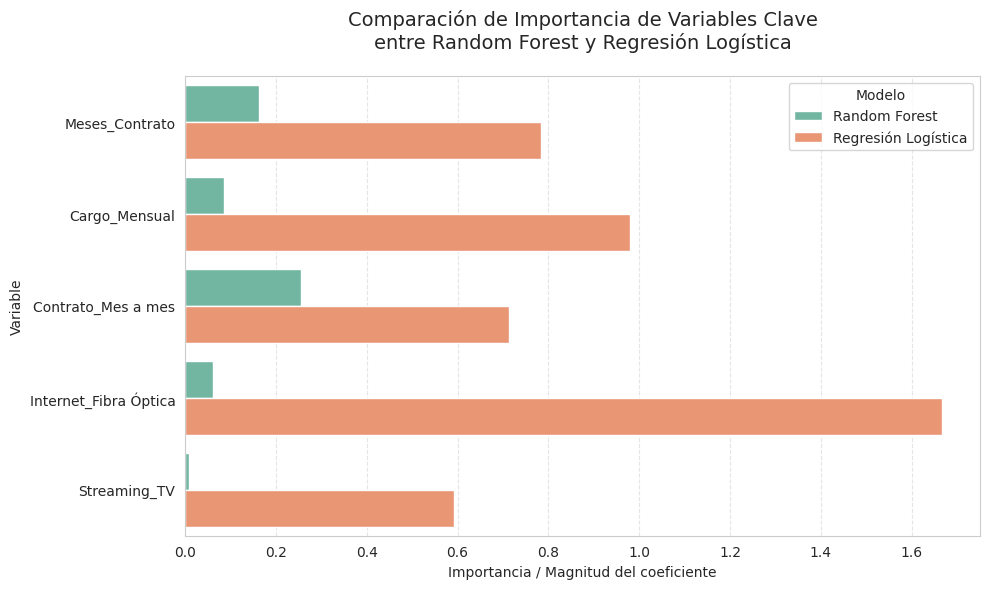

In [229]:
# Preparar datos para gráfico
common_vars = ['Meses_Contrato', 'Cargo_Mensual', 'Contrato_Mes a mes',
               'Internet_Fibra Óptica', 'Streaming_TV']

# Filtrar
plot_data = []

for var in common_vars:
    imp_rf = importancia_df[importancia_df['Característica'] == var]['Importancia'].values[0]
    imp_lr = abs(coef_df[coef_df['Característica'] == var]['Coeficiente'].values[0])
    plot_data.append({'Variable': var, 'Importancia': imp_rf, 'Modelo': 'Random Forest'})
    plot_data.append({'Variable': var, 'Importancia': imp_lr, 'Modelo': 'Regresión Logística'})

df_plot = pd.DataFrame(plot_data)

# Gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Importancia', y='Variable', hue='Modelo', palette='Set2')

# plt.title('Comparación de Importancia de Variables Clave\nentre Random Forest y Regresión Logística', fontsize=14, pad=20)
# plt.xlabel('Importancia / Magnitud del coeficiente')
# plt.ylabel('Variable')
# plt.legend(title='Modelo')
# plt.tight_layout()
# plt.show()

plt.title("Comparación de Importancia de Variables Clave\nentre Random Forest y Regresión Logística", fontsize=14, pad=20)
plt.xlabel("Importancia / Magnitud del coeficiente")
plt.ylabel("Variable")
plt.legend(title="Modelo", loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# "La importancia en Random Forest es relativa (escala 0–1). La magnitud del coeficiente en Regresión Logística no está normalizada."

# 📊 Informe: Predicción de Cancelación de Clientes

Este notebook presenta un análisis completo para predecir la **cancelación de clientes (abandono)** utilizando modelos de machine learning.  
Se desarrollaron dos modelos: **Regresión Logística** y **Random Forest**, con enfoque en **interpretabilidad, desempeño y estrategias de retención**.

---

## 🧪 Metodología

### 1. Preprocesamiento
- ✅ Eliminación de `ID_Cliente` (no predictivo)
- ✅ One-hot encoding para variables categóricas
- ✅ Eliminación de `Cargo_Total` y `Cargo_Diario` (riesgo de *data leakage*)
- ✅ Escalamiento de variables numéricas (`Meses_Contrato`, `Cargo_Mensual`) para Regresión Logística

### 2. División de datos
- 80% entrenamiento, 20% prueba
- Estratificación por `Abandono` para mantener proporción de clases

### 3. Modelos entrenados
| Modelo | Hiperparámetros clave | Escalamiento |
|-------|------------------------|--------------|
| **Regresión Logística** | `C=10`, `penalty='l1'`, `solver='saga'` | ✅ Sí |
| **Random Forest** | `max_depth=8`, `min_samples_split=20` | ❌ No |

---

## 📊 Desempeño de los Modelos

| Métrica | Regresión Logística | Random Forest |
|--------|----------------------|---------------|
| **Recall (clase 1)** | 0.79 | 0.79 |
| **F1-score (clase 1)** | 0.62 | 0.63 |
| **ROC-AUC** | 0.8423 | 0.8424 |
| **Accuracy** | 0.74 | 0.75 |
| **Interpretabilidad** | ✅ Alta | ⚠️ Media |

> ✅ Ambos modelos detectan el **79% de los abandonos reales**, lo cual es excelente para un sistema de retención.

---

## 🔍 Factores que más influyen en la cancelación

### 1. **Fibra Óptica → +1.67 (Regresión Logística)**
- Los clientes con fibra óptica tienen **el mayor riesgo de cancelar**.
- Posibles causas: problemas de calidad, expectativas no cumplidas.

### 2. **Contrato Mes a mes → +0.71**
- Contratos flexibles = mayor riesgo.
- Ideal para campañas de conversión a contrato anual.

### 3. **Meses en la empresa → -0.78**
- Cada mes adicional reduce el riesgo.
- Los nuevos clientes (menos de 6 meses) son los más vulnerables.

### 4. **Streaming_TV y Streaming_Peliculas → +0.50**
- Aumentan el riesgo: posiblemente por costo sin uso real.

### 5. **Soporte Técnico y Seguridad Online → negativos**
- Reducen el riesgo: servicios que **sí retienen**.

---

## 📈 Variables clave confirmadas por ambos modelos

| Variable | Impacto |
|--------|--------|
| `Internet_Fibra Óptica` | ⬆️ Alto riesgo |
| `Contrato_Mes a mes` | ⬆️ Alto riesgo |
| `Meses_Contrato` | ⬇️ Reduce riesgo |
| `Streaming_TV` | ⬆️ Aumenta riesgo |
| `Soporte_Tecnico` | ⬇️ Reduce riesgo |

---

## 🛠️ Estrategias de Retención Propuestas

### ✅ 1. Programa para usuarios de fibra óptica
- Auditoría de calidad del servicio
- Soporte técnico proactivo
- Descuento por renovación

### ✅ 2. Conversión de contratos mes a mes
- Oferta de 3 meses gratis al pasar a contrato anual
- Alertas automáticas a clientes con >3 meses en plan flexible

### ✅ 3. Bienvenida para nuevos clientes
- Seguimiento personalizado en primeros 3 meses
- Guía de uso de servicios
- Soporte prioritario

### ✅ 4. Optimización de servicios adicionales
- Encuesta de uso de streaming → si no lo usan, ofrecer downgrade
- Promover servicios que retienen: `Soporte_Tecnico`, `Seguridad_Online`

### ✅ 5. Sistema de alertas predictivas
- Integrar modelo en CRM
- Priorizar clientes con P(Abandono) > 70%
- Asignar a equipo de retención con script personalizado

---

## 📊 Gráfico: Comparación de importancia de variables


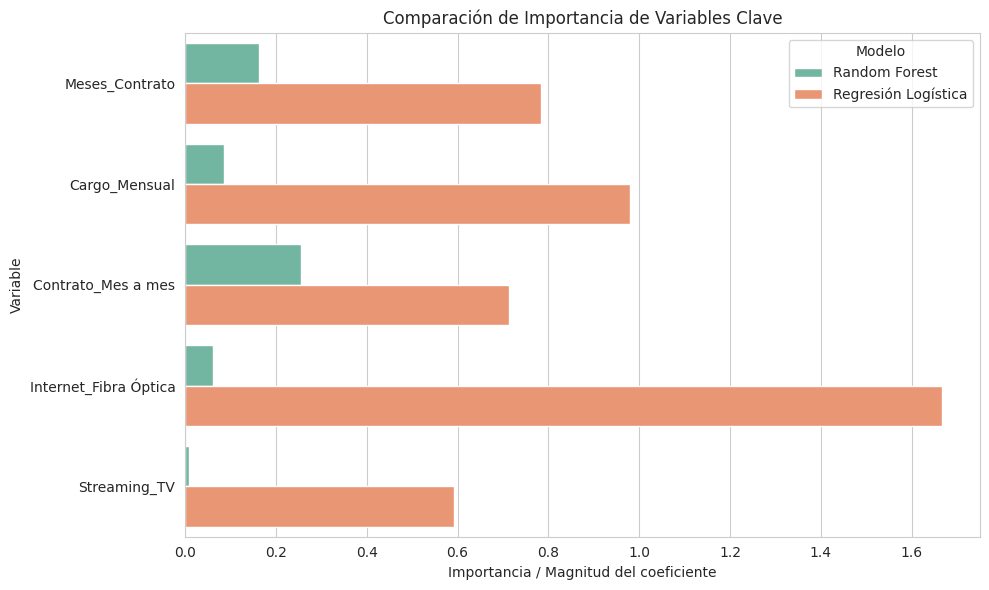

In [230]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


common_vars = ['Meses_Contrato', 'Cargo_Mensual', 'Contrato_Mes a mes',
               'Internet_Fibra Óptica', 'Streaming_TV']

plot_data = []

for var in common_vars:
    imp_rf = importancia_df[importancia_df['Característica'] == var]['Importancia'].values[0]
    imp_lr = abs(coef_df[coef_df['Característica'] == var]['Coeficiente'].values[0])
    plot_data.append({'Variable': var, 'Valor': imp_rf, 'Modelo': 'Random Forest'})
    plot_data.append({'Variable': var, 'Valor': imp_lr, 'Modelo': 'Regresión Logística'})

df_plot = pd.DataFrame(plot_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Valor', y='Variable', hue='Modelo', palette='Set2')
plt.title('Comparación de Importancia de Variables Clave')
plt.xlabel('Importancia / Magnitud del coeficiente')
plt.ylabel('Variable')
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()